In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('bitcoinvalue.csv',header=None)
data.columns = ['Months','Price']
data.head()

,Months,Price
0,0,217.4
1,1,255.7
2,2,244.3
3,3,236.1
4,4,228.7


In [4]:
# Handle missing values by dropping any rows with NaN values
data = data.dropna()

In [5]:
# Split the data into training and testing sets
X = data[['Months']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Display the preprocessed data
print("\nPreprocessed training data:")
print(pd.DataFrame(X_train_scaled, columns=['month']).head())


Preprocessed training data:
      month
0  1.128359
1 -0.276686
2 -1.573650
3 -1.141329
4  0.155636


In [8]:
print("\nPreprocessed testing data:")
print(pd.DataFrame(X_test_scaled, columns=['month']).head())


Preprocessed testing data:
      month
0  1.560681
1  0.047555
2  1.020279
3  0.263716
4 -0.709007


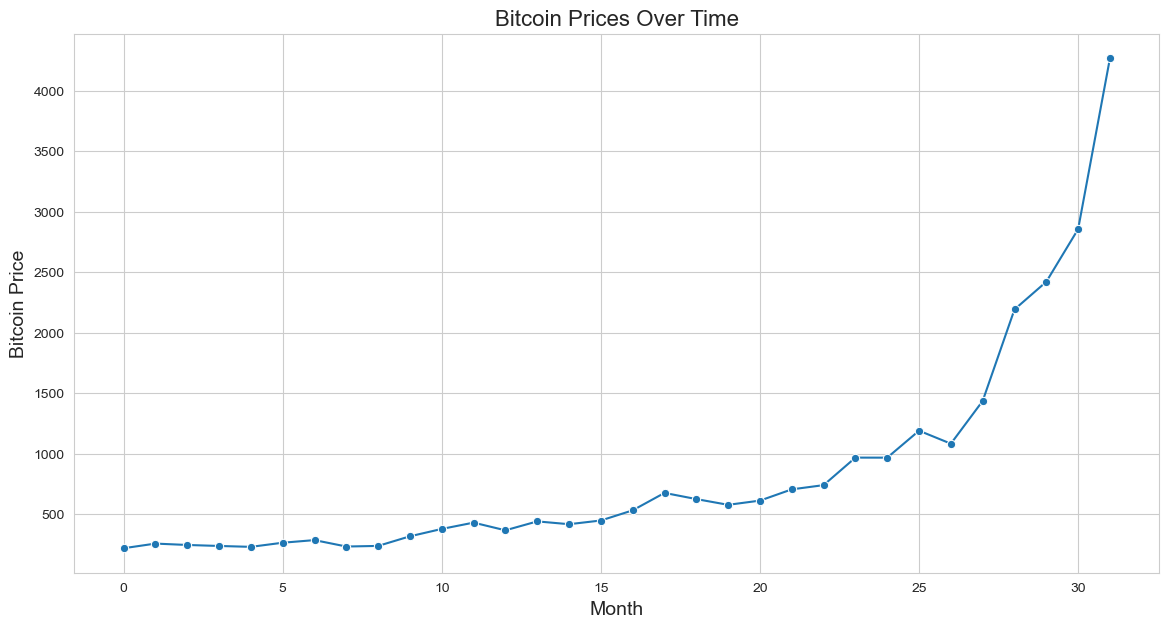

In [30]:
# Line plot of Bitcoin prices
plt.figure(figsize=(14, 7))
sns.lineplot(x='Months', y='Price', data=data, marker='o')
plt.title('Bitcoin Prices Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Bitcoin Price', fontsize=14)
plt.show()

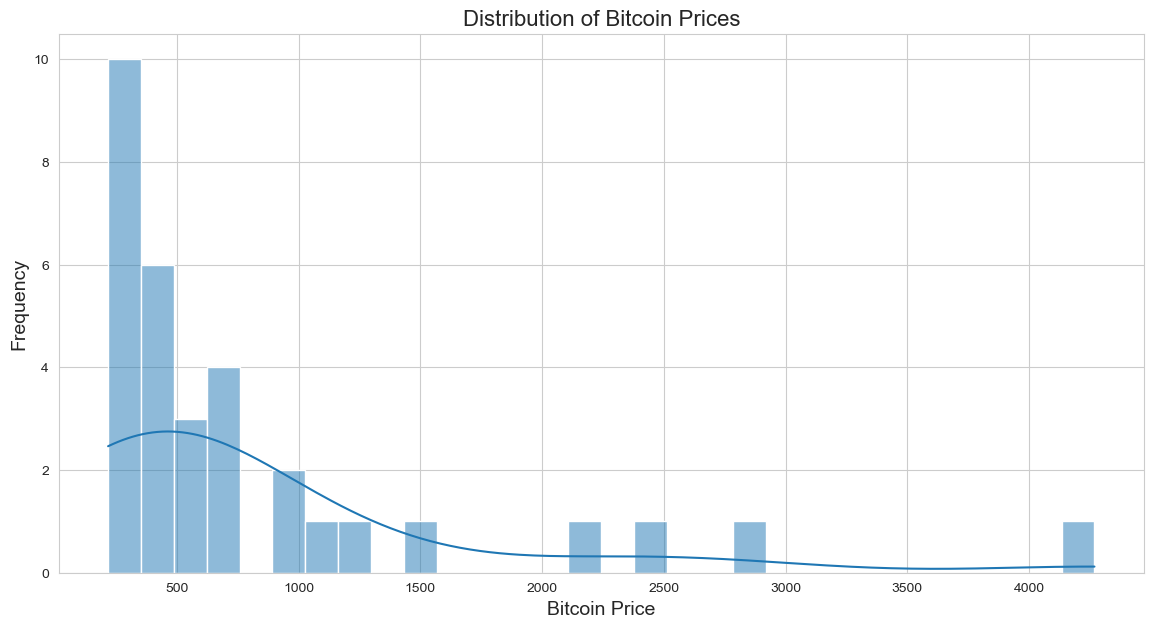

In [31]:
# Histogram of Bitcoin prices
plt.figure(figsize=(14, 7))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Bitcoin Prices', fontsize=16)
plt.xlabel('Bitcoin Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


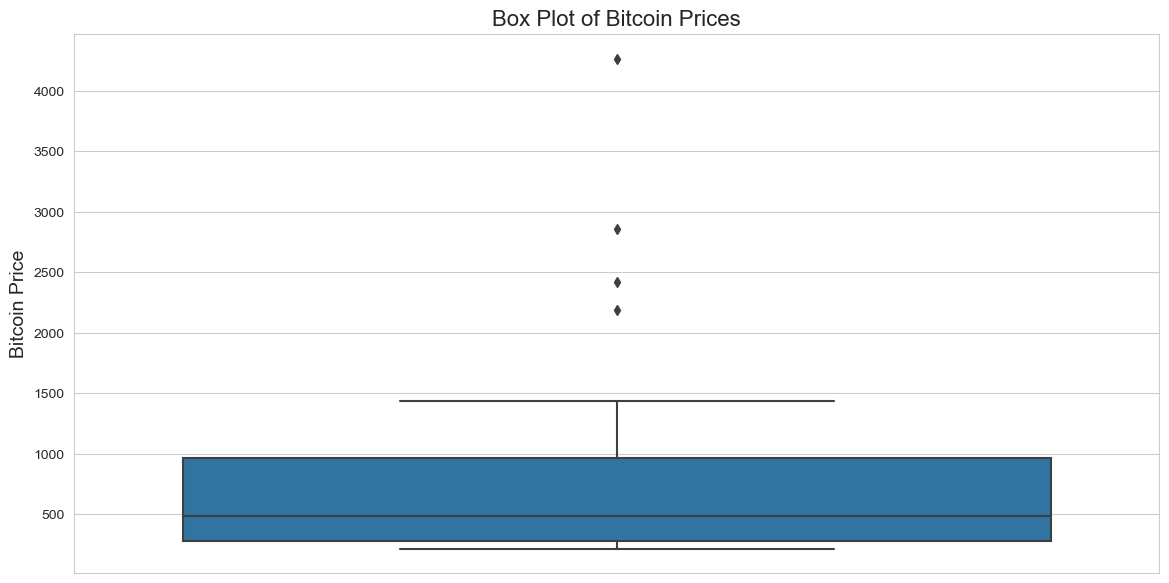

In [32]:
# Box plot of Bitcoin prices
plt.figure(figsize=(14, 7))
sns.boxplot(y=data['Price'])
plt.title('Box Plot of Bitcoin Prices', fontsize=16)
plt.ylabel('Bitcoin Price', fontsize=14)
plt.show()

In [33]:
# Statistical summary of the data
print(data['Price'].describe())

count      32.000000
mean      838.196875
std       908.925885
min       217.400000
25%       279.100000
50%       488.650000
75%       966.300000
max      4268.800000
Name: Price, dtype: float64


<Figure size 1400x1000 with 0 Axes>

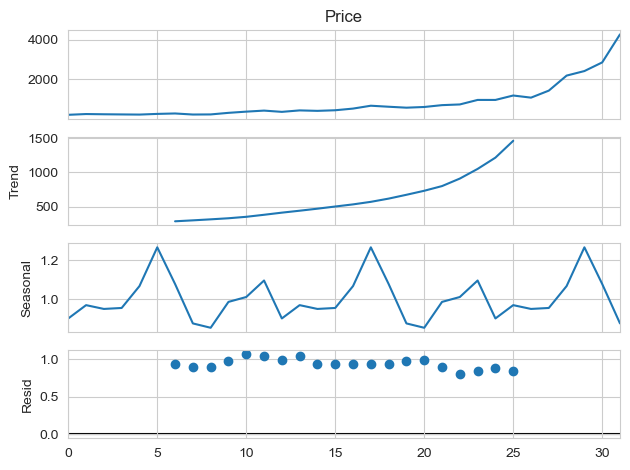

In [37]:
# Perform seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['Price'], model='multiplicative', period=12)
# Plot the seasonal decomposition
plt.figure(figsize=(14, 10))
result.plot()
plt.show()

In [38]:
# Calculate the correlation matrix
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
          Months     Price
Months  1.000000  0.772218
Price   0.772218  1.000000


In [9]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print(f"Linear Regression - MSE: {lr_mse}, R2: {lr_r2}")

Linear Regression - MSE: 285946.8499690293, R2: 0.7059490390558258


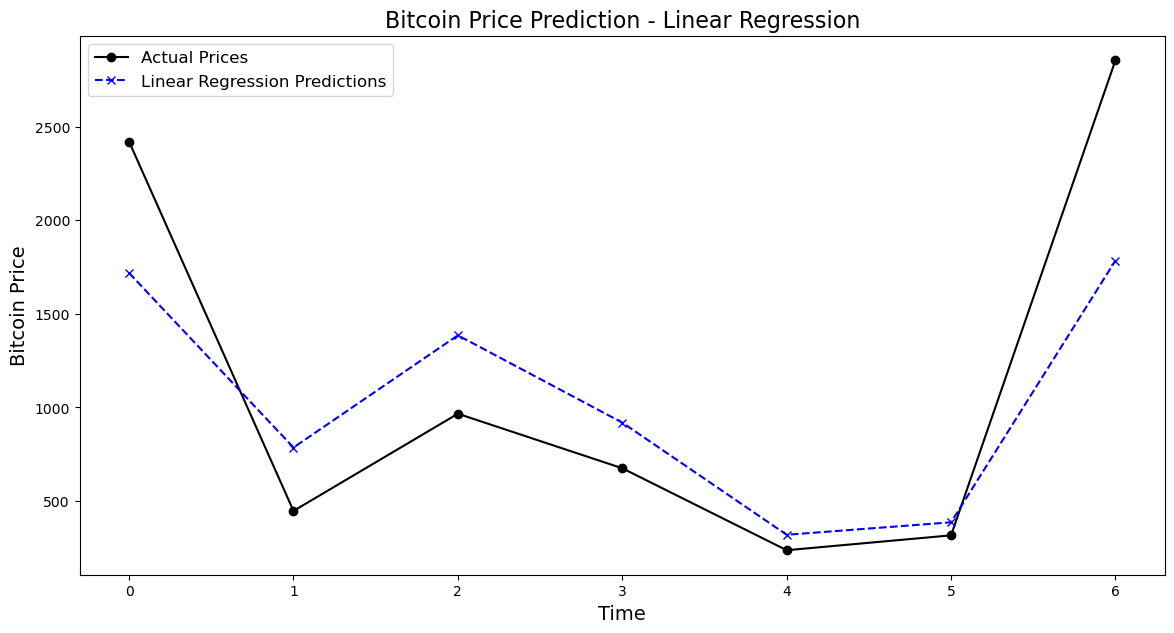

In [10]:
# Plot for Linear Regression
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='black', marker='o')
plt.plot(lr_predictions, label='Linear Regression Predictions', linestyle='--', color='blue', marker='x')
plt.title('Bitcoin Price Prediction - Linear Regression', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Bitcoin Price', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.show()

In [11]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
print(f"Decision Tree - MSE: {dt_mse}, R2: {dt_r2}")

Decision Tree - MSE: 296258.05571428576, R2: 0.6953456001362708


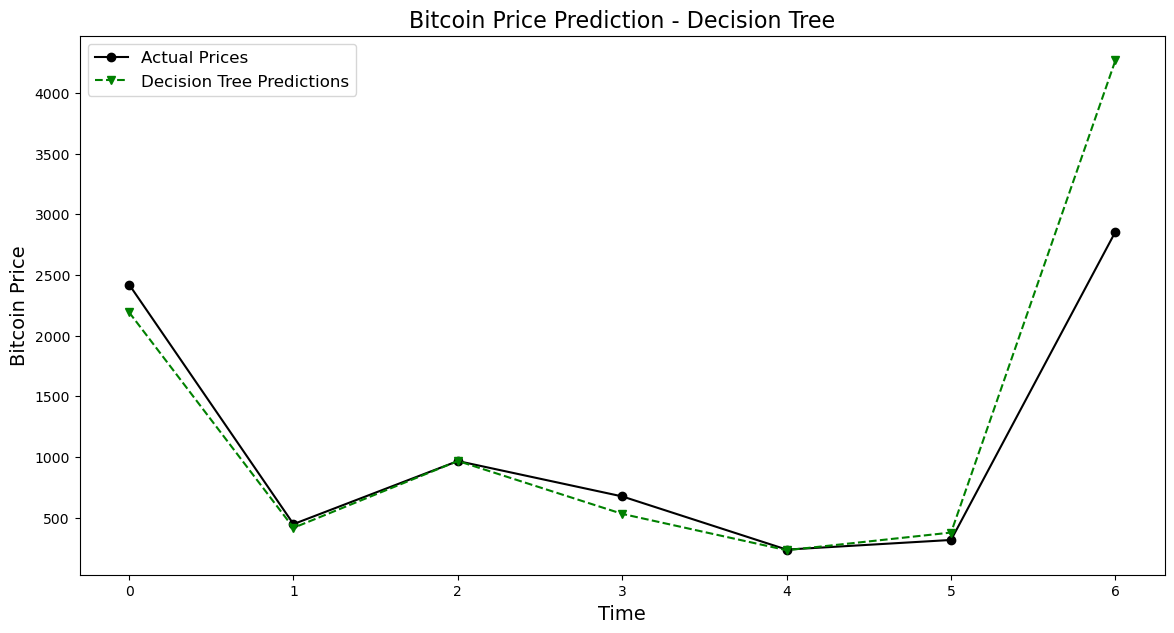

In [12]:
# Plot for Decision Tree
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='black', marker='o')
plt.plot(dt_predictions, label='Decision Tree Predictions', linestyle='--', color='green', marker='v')
plt.title('Bitcoin Price Prediction - Decision Tree', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Bitcoin Price', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.show()

In [13]:
#xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_predictions = xgb_model.predict(X_test_scaled)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f"XGBoost - MSE: {xgb_mse}, R2: {xgb_r2}")

XGBoost - MSE: 74629.84064790866, R2: 0.9232550512096742


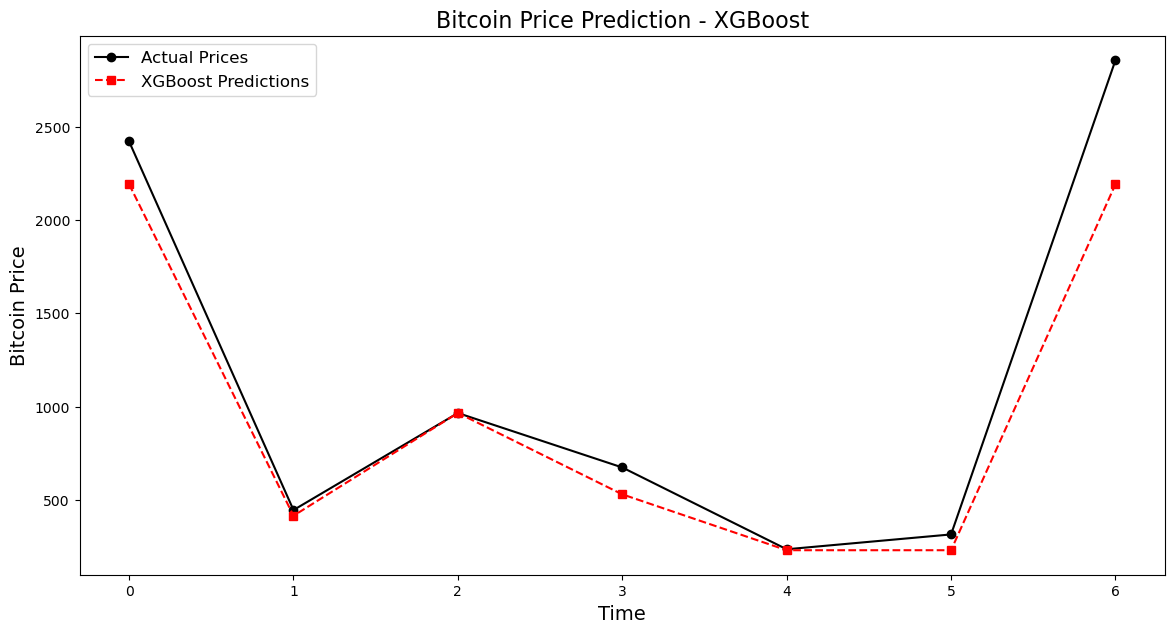

In [14]:
# Plot for XGBoost
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='black', marker='o')
plt.plot(xgb_predictions, label='XGBoost Predictions', linestyle='--', color='red', marker='s')
plt.title('Bitcoin Price Prediction - XGBoost', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Bitcoin Price', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.show()

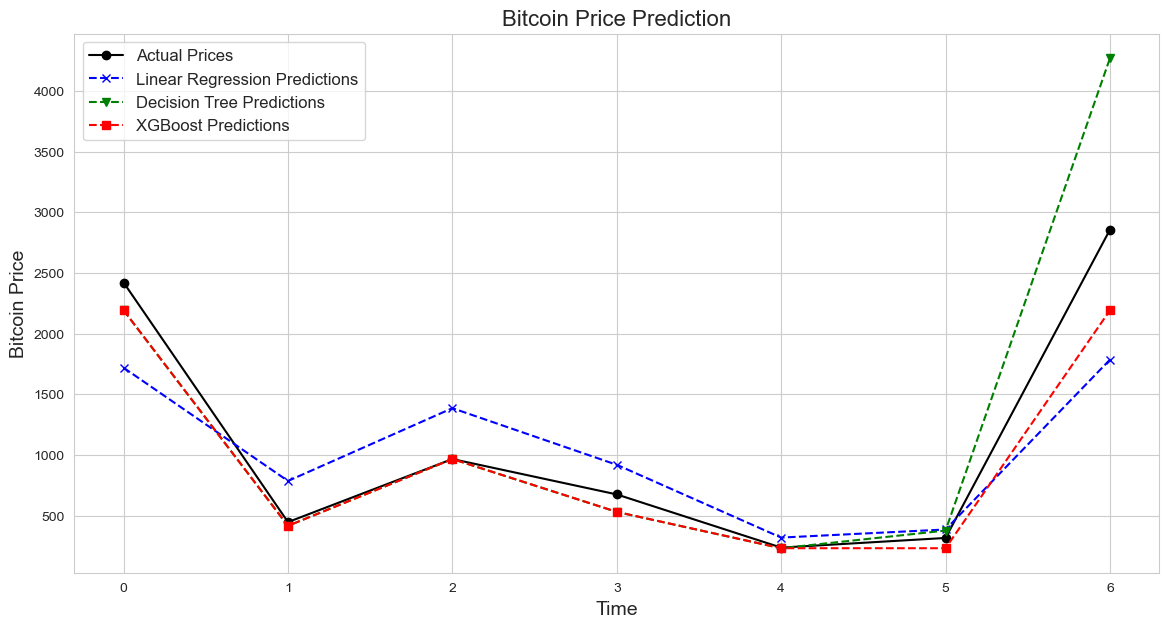

In [15]:
#visualization
sns.set_style("whitegrid")

plt.figure(figsize=(14, 7))

plt.plot(y_test.values, label='Actual Prices', color='black', marker='o')
plt.plot(lr_predictions, label='Linear Regression Predictions', linestyle='--', color='blue', marker='x')
plt.plot(dt_predictions, label='Decision Tree Predictions', linestyle='--', color='green', marker='v')
plt.plot(xgb_predictions, label='XGBoost Predictions', linestyle='--', color='red', marker='s')

plt.title('Bitcoin Price Prediction', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Bitcoin Price', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.show()

In [16]:
#random forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest - MSE: {rf_mse}, R2: {rf_r2}")

Random Forest - MSE: 90788.31414085615, R2: 0.9066386252602125


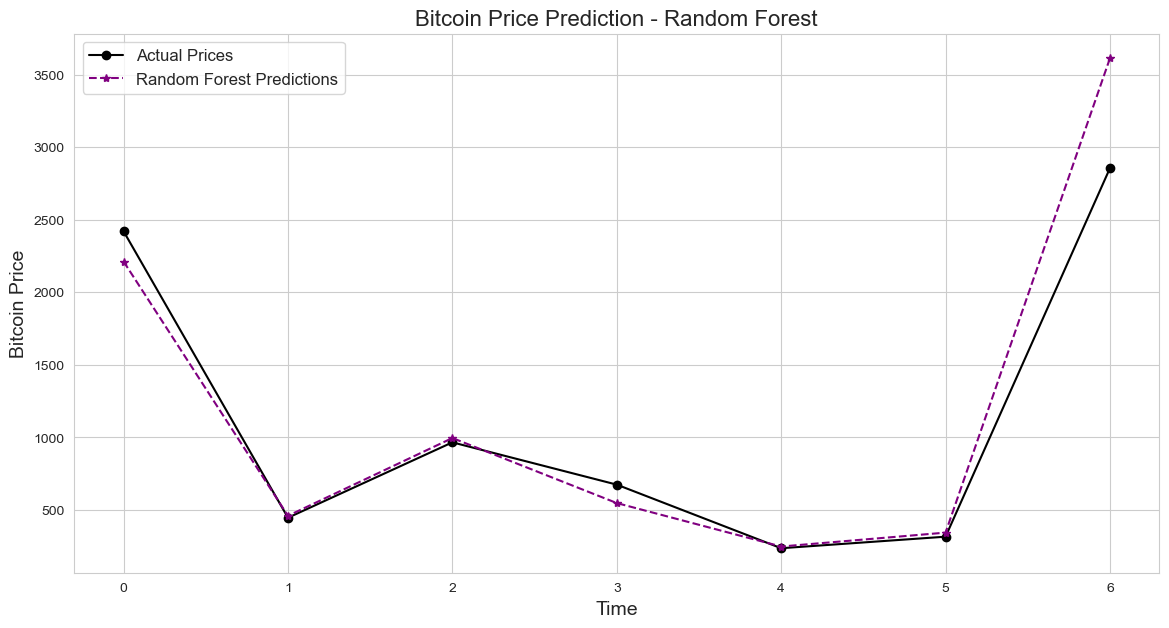

In [17]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='black', marker='o')
plt.plot(rf_predictions, label='Random Forest Predictions', linestyle='--', color='purple', marker='*')
plt.title('Bitcoin Price Prediction - Random Forest', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Bitcoin Price', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.show()

In [18]:
#svr
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
svr_predictions = svr_model.predict(X_test_scaled)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)
print(f"SVR - MSE: {svr_mse}, R2: {svr_r2}")

SVR - MSE: 1436991.4777502825, R2: -0.47771771203923175


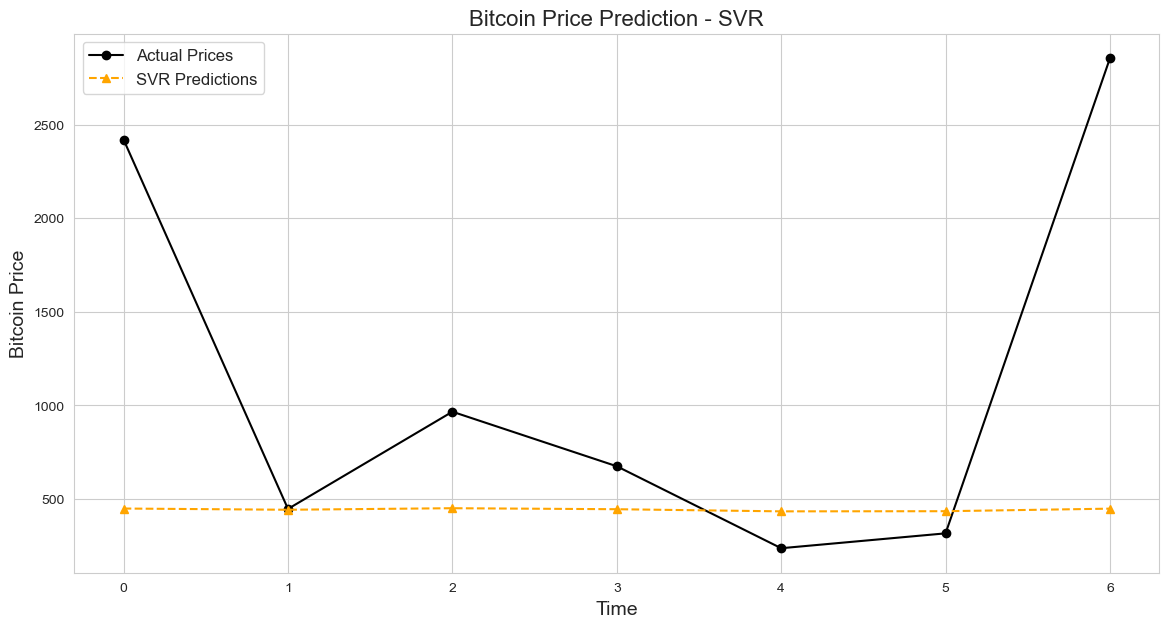

In [19]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='black', marker='o')
plt.plot(svr_predictions, label='SVR Predictions', linestyle='--', color='orange', marker='^')
plt.title('Bitcoin Price Prediction - SVR', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Bitcoin Price', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.show()

In [20]:
#gradient boosting
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_predictions = gb_model.predict(X_test_scaled)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
print(f"Gradient Boosting - MSE: {gb_mse}, R2: {gb_r2}")

Gradient Boosting - MSE: 295596.36346888414, R2: 0.6960260456128716


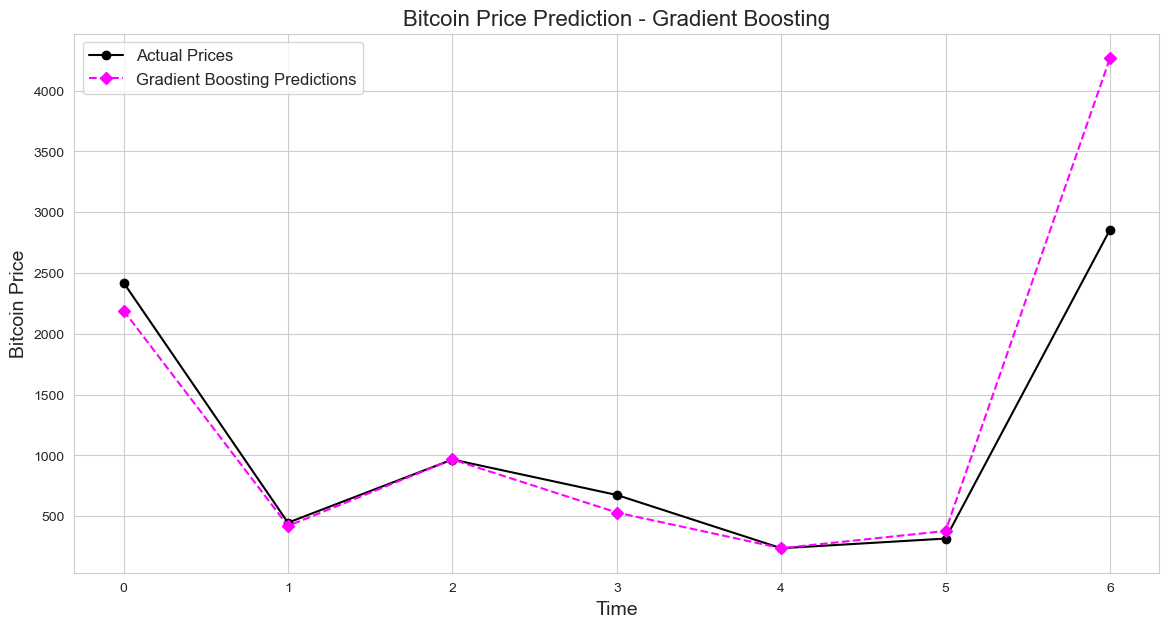

In [21]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='black', marker='o')
plt.plot(gb_predictions, label='Gradient Boosting Predictions', linestyle='--', color='magenta', marker='D')
plt.title('Bitcoin Price Prediction - Gradient Boosting', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Bitcoin Price', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.show()

In [22]:
#knn
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
print(f"KNN - MSE: {knn_mse}, R2: {knn_r2}")

KNN - MSE: 123322.38691428563, R2: 0.8731824939424842


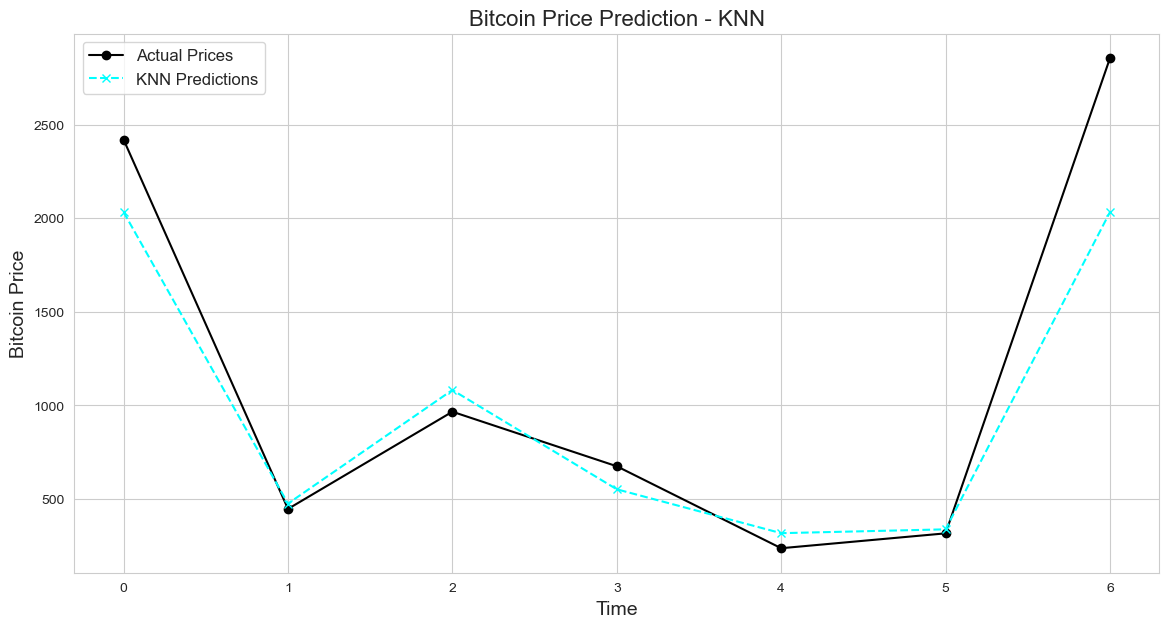

In [23]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='black', marker='o')
plt.plot(knn_predictions, label='KNN Predictions', linestyle='--', color='cyan', marker='x')
plt.title('Bitcoin Price Prediction - KNN', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Bitcoin Price', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.show()

In [24]:
#ridge regression
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print(f"Ridge Regression - MSE: {ridge_mse}, R2: {ridge_r2}")

Ridge Regression - MSE: 303296.2222072804, R2: 0.688107962719477


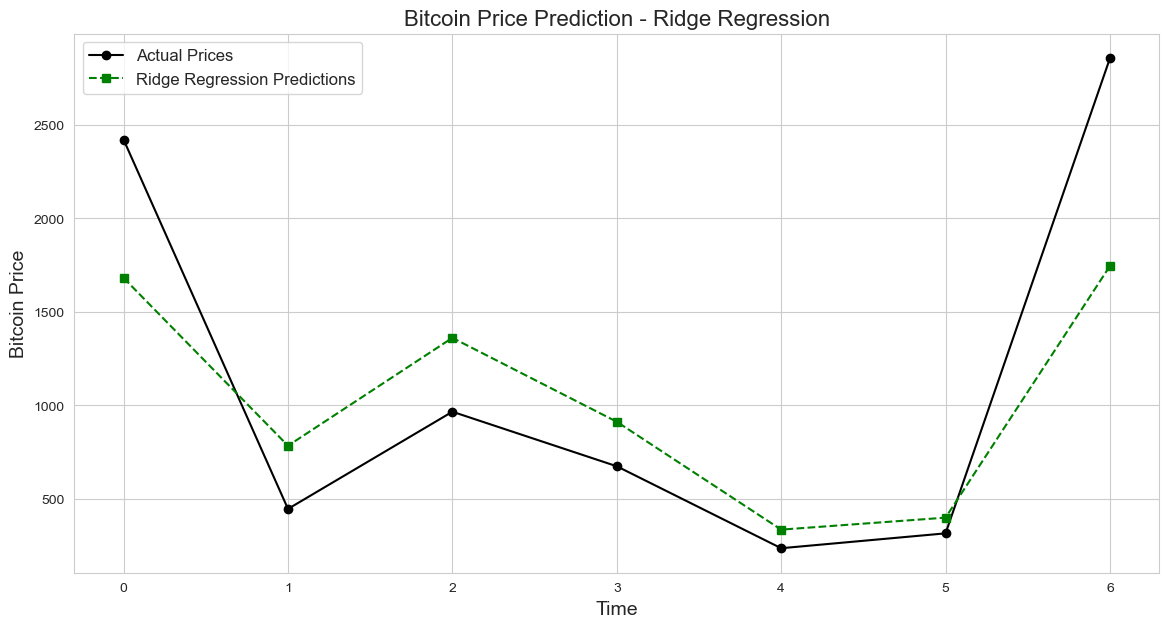

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='black', marker='o')
plt.plot(ridge_predictions, label='Ridge Regression Predictions', linestyle='--', color='green', marker='s')
plt.title('Bitcoin Price Prediction - Ridge Regression', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Bitcoin Price', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.show()

In [26]:
#lasso regression

from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
lasso_predictions = lasso_model.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print(f"Lasso Regression - MSE: {lasso_mse}, R2: {lasso_r2}")

Lasso Regression - MSE: 286017.5816135429, R2: 0.7058763027831911


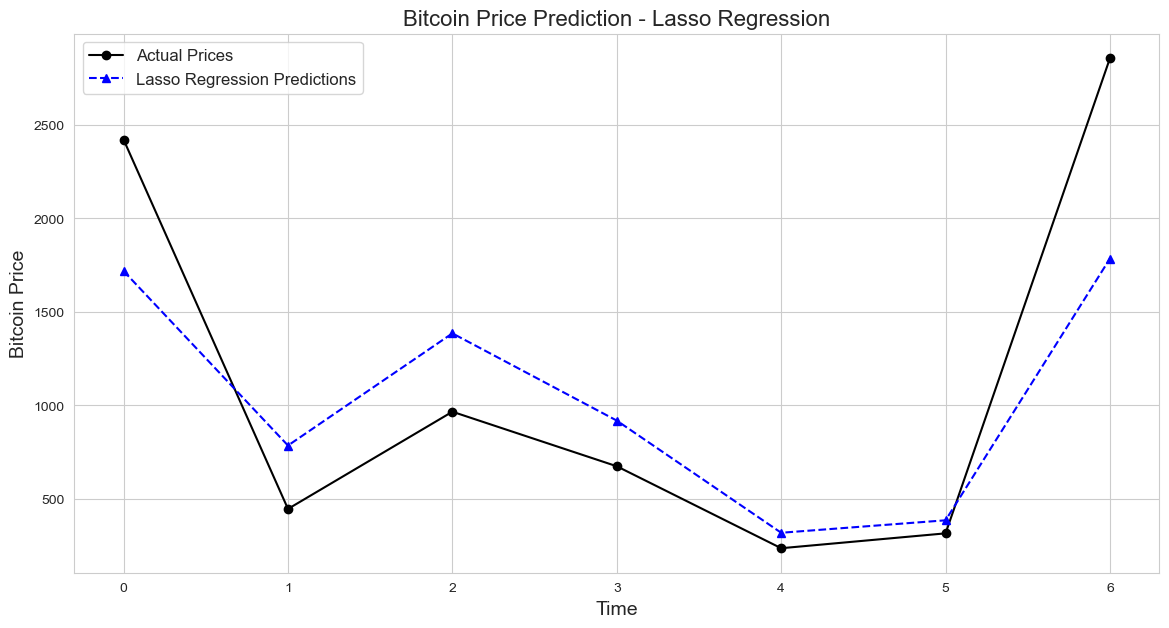

In [27]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='black', marker='o')
plt.plot(lasso_predictions, label='Lasso Regression Predictions', linestyle='--', color='blue', marker='^')
plt.title('Bitcoin Price Prediction - Lasso Regression', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Bitcoin Price', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.show()

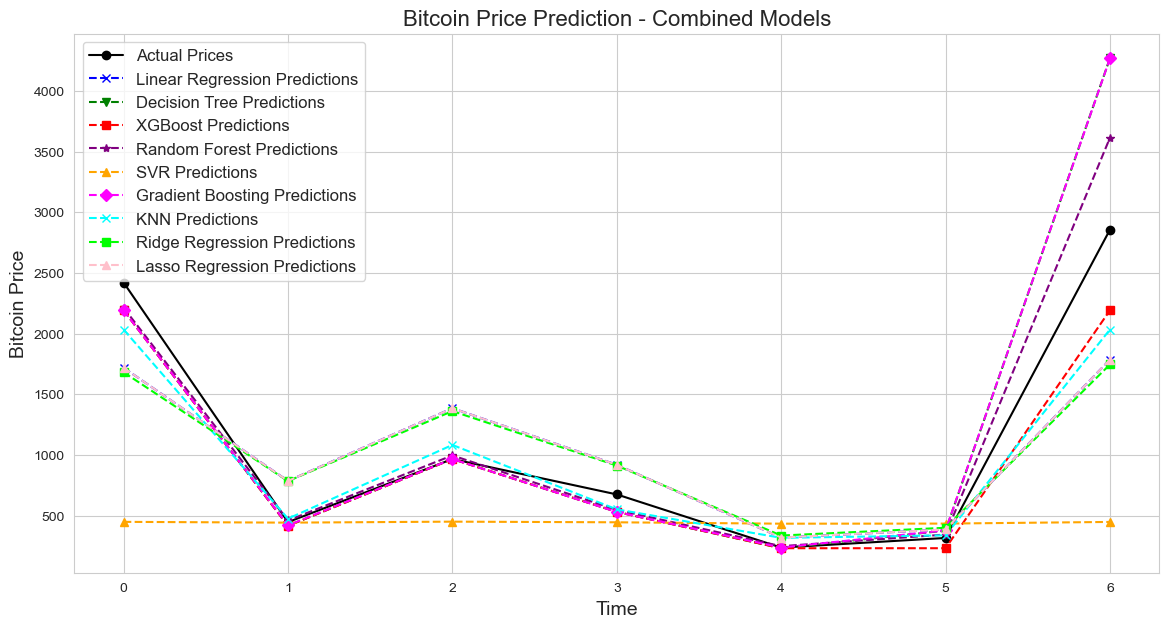

In [28]:
sns.set_style("whitegrid")

plt.figure(figsize=(14, 7))

# Plot actual prices
plt.plot(y_test.values, label='Actual Prices', color='black', marker='o')

# Plot predictions from each model
plt.plot(lr_predictions, label='Linear Regression Predictions', linestyle='--', color='blue', marker='x')
plt.plot(dt_predictions, label='Decision Tree Predictions', linestyle='--', color='green', marker='v')
plt.plot(xgb_predictions, label='XGBoost Predictions', linestyle='--', color='red', marker='s')
plt.plot(rf_predictions, label='Random Forest Predictions', linestyle='--', color='purple', marker='*')
plt.plot(svr_predictions, label='SVR Predictions', linestyle='--', color='orange', marker='^')
plt.plot(gb_predictions, label='Gradient Boosting Predictions', linestyle='--', color='magenta', marker='D')
plt.plot(knn_predictions, label='KNN Predictions', linestyle='--', color='cyan', marker='x')
plt.plot(ridge_predictions, label='Ridge Regression Predictions', linestyle='--', color='lime', marker='s')
plt.plot(lasso_predictions, label='Lasso Regression Predictions', linestyle='--', color='pink', marker='^')

# Add titles and labels
plt.title('Bitcoin Price Prediction - Combined Models', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Bitcoin Price', fontsize=14)

# Add a legend
plt.legend(loc='best', fontsize=12)

# Display the plot
plt.show()